<img src="https://disrupt-africa.com/wp-content/uploads/2019/10/Sendy-702x336.jpg" width=90%/>

[Sendy](https://www.sendyit.com/) is a business-to-business platform established in 2014, to enable businesses of all types and sizes to transport goods more efficiently across East Africa.The company is headquartered in Kenya with a team of more than 100 staff, focused on building practical solutions for Africa’s dynamic transportation needs, from developing apps and web solutions, to providing dedicated support for goods on the move.

Data is a critical component in helping Sendy to build more efficient, affordable and accessible solutions. Given the details of a Sendy order, we'll build a a model  that predicts an accurate delivery time, from picking up a package to arriving at the final destination. An accurate arrival time prediction will help all businesses to improve their logistics and communicate an accurate time to their customers.
***
### Section 1: Exploratory Data Analysis
- On which day of the week are most orders placed?
- Merge the training set with the Riders dataset
- Which platform type is used more?
- Visualise missing values
- Visualise Correlations between columns

### Section 2: Data Preprocessing
- Convert Pickup Time and Arrival Time to datetime.date objects
- Visualise correlations between features once the time columns have been coonverted to integers
- Drop redundent columns based on analysis
- Get Dummies for (Platform Type, Personal or Business)
- Fill the missing values in the temperature column with (mean) temperatures
         
### Section 3: Machine Learning
- Feature Engineering
- Model Selection
- Create functions to train, make predictions and test the model
- Deploy the model to Zindi
***
   
    
## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time  


%matplotlib inline

C:\Users\yanga\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***
# Section 1: Exploratory Data Analysis

***

### Getting the data

In [3]:
data = pd.read_csv('C:/Users/yanga/Documents/Sendy Logistics Challenge/Train.csv')
riders = pd.read_csv('C:/Users/yanga/Documents/Sendy Logistics Challenge/Riders.csv')
sample_data = pd.read_csv('C:/Users/yanga/Documents/Sendy Logistics Challenge/SampleSubmission.csv')
testing = pd.read_csv('C:/Users/yanga/Documents/Sendy Logistics Challenge/Test.csv')

In [4]:
# Make coppies of the data
train = data.copy()
ride = riders.copy()
sample = sample_data.copy()
test = testing.copy()
tester1 = train.copy()

In [124]:
train.head(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455


In [5]:
ride.head(3)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466


### Merge the Training set and the Riders set

In [9]:
train_merge =  pd.merge(train, ride, on='Rider Id', how='inner')
test_merge = pd.merge(test, ride, on='Rider Id', how='inner')

train_merge.head(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549


### Which Platform Type is used the most?

- A bulk of the orders are placed on platform type 3, for business.

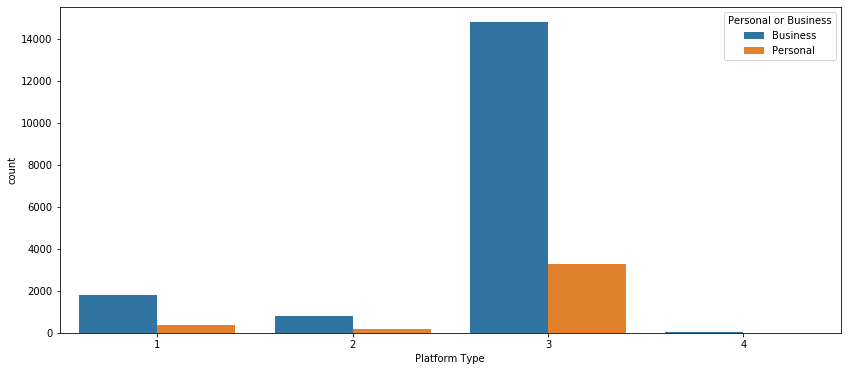

In [10]:
_ = plt.figure(figsize=(14,6))
_ = sns.countplot(train_merge['Platform Type'],hue=train['Personal or Business'], data=train_merge)

### Visualise Time from Pickup to Arrival
- This will show how much time it generally takes to complete an order

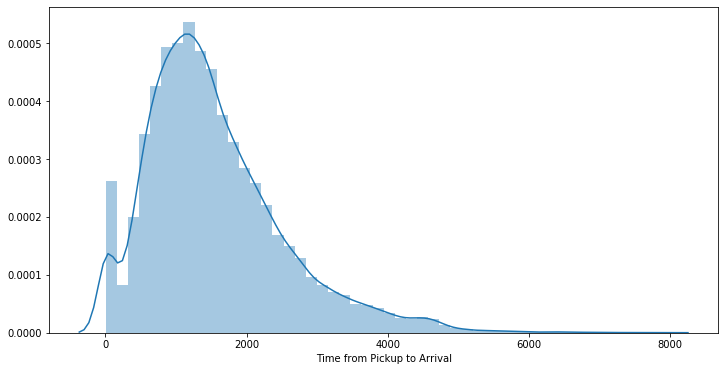

In [11]:
_ = plt.figure(figsize=(12,6))
_ = sns.distplot(train_merge['Time from Pickup to Arrival'], bins=50)

### Visualise missing values
- Temperature (20.59% missing) for both Training and Testing data
- Precipitation in millimeters (97.4% missing) for both Training and Testing data

Precipitation % Missing Data: 97.4
Temperature % Missing Data: 20.59


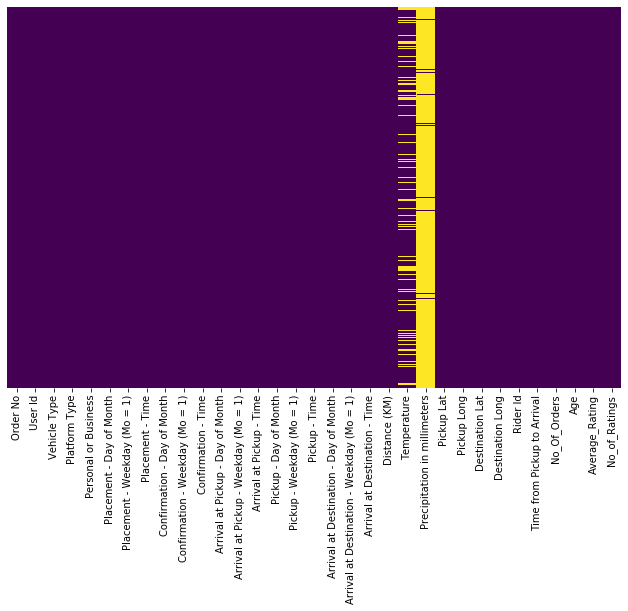

In [12]:
# Visualise Missing
plt.figure(figsize=(11,7))
sns.heatmap(train_merge.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Calculate the prcentage of missing data
precipitation_pmd = round(train_merge['Precipitation in millimeters'].isnull().sum()/train_merge['Precipitation in millimeters'].shape[0] * 100,2)
print("Precipitation % Missing Data: " + str(precipitation_pmd))

temp_pmd = round(train_merge['Temperature'].isnull().sum()/train_merge['Temperature'].shape[0] * 100,2)
print("Temperature % Missing Data: " + str(temp_pmd))

### Visualise Correlation between columns
- Our target variable correlates with distance

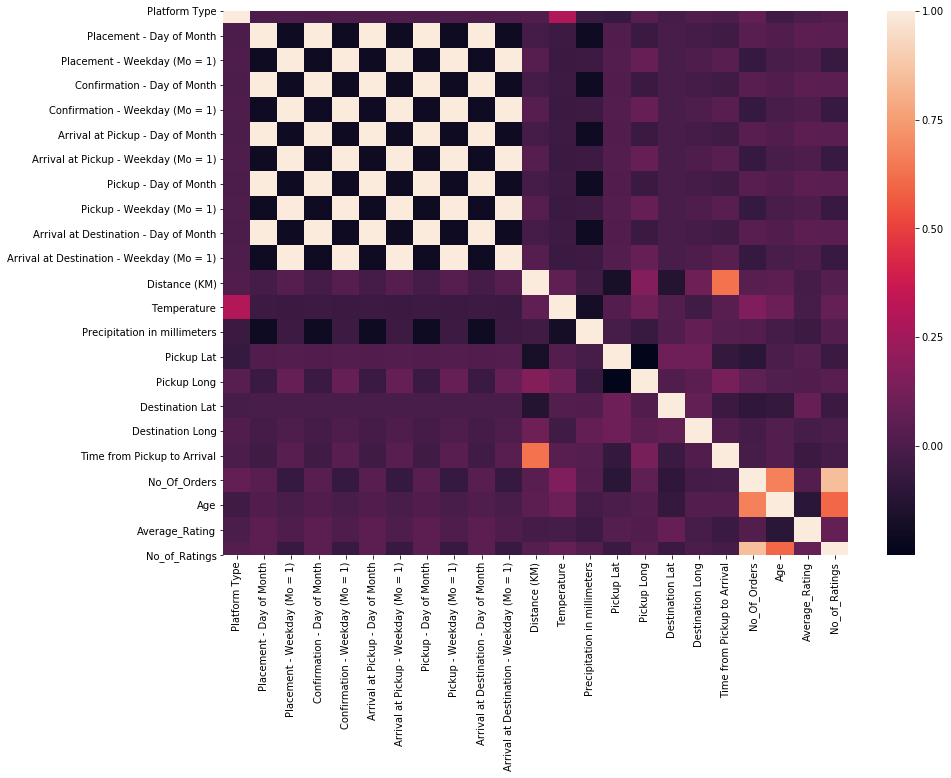

In [13]:
correlation = train_merge.dropna().corr()
_ = plt.figure(figsize=(14,10))
_ = sns.heatmap(correlation)

***
# Section 2: Data Preprocessing
***

### Convert time features to integers

In [14]:
def string_int(df,cols):
    
    """
    Takes a dataframe with time in string format and converts the 
    column data to integers
    
    param df: input dataframe
    param col: list of column names to be converted
    return df: returns a dataframe with the converted column data
    
    """
    time_to_int = lambda ss: (ss.hour * 60 + ss.minute) * 60 + ss.second
   
    
    for column_name in cols:
        df['Integer - '+column_name] = [time_to_int(datetime.strptime(i,'%I:%M:%S %p')) for i in df[column_name]]
                    
    df_clean = df.drop(cols,1)
            
    return df_clean

In [15]:
# Convert 

train_cols = ['Placement - Time','Confirmation - Time','Arrival at Pickup - Time','Pickup - Time','Arrival at Destination - Time']
test_cols = ['Placement - Time','Confirmation - Time','Arrival at Pickup - Time','Pickup - Time']
train_1 = string_int(train_merge,train_cols)
test_1 = string_int(test_merge,test_cols)

In [16]:
train_1.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Precipitation in millimeters', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'Integer - Placement - Time',
       'Integer - Confirmation - Time', 'Integer - Arrival at Pickup - Time',
       'Integer - Pickup - Time', 'Integer - Arrival at Destination - Time'],
      dtype='object')

In [17]:
test_1.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id', 'No_Of_Orders',
       'Age', 'Average_Rating', 'No_of_Ratings', 'Integer - Placement - Time',
       'Integer - Confirmation - Time', 'Integer - Arrival at Pickup - Time',
       'Integer - Pickup - Time'],
      dtype='object')

### Drop Redundant Columns
Drop the Precipitation column because more than 97% of the data on this column is missing

In [18]:
train_1.drop(['Precipitation in millimeters','Vehicle Type'], 1, inplace=True)
test_1.drop(['Precipitation in millimeters','Vehicle Type'], 1, inplace=True)

In [19]:
test_1.columns

Index(['Order No', 'User Id', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       'Integer - Placement - Time', 'Integer - Confirmation - Time',
       'Integer - Arrival at Pickup - Time', 'Integer - Pickup - Time'],
      dtype='object')

In [20]:
test_1.shape

(7068, 27)

### Create a function to create dummy variables

In [21]:
def make_dummies(df,column):
    """
    Takes a dataframe and a list of columns for which to create dummies.
    """
    dummies = pd.get_dummies(df[column],drop_first=True)
    df.drop(column,1,inplace=True)
    df = pd.concat([df,dummies],axis=1)
    
    return df

### Create Dummies for: Personal or Business
Do this for both the training set and testing set

In [22]:
# Make Dummy Variables for Personal or Business

train_2 = make_dummies(train_1,'Personal or Business')
test_2 = make_dummies(test_1,'Personal or Business')

# Make Dummy Variables for Platform Type

train_3 = make_dummies(train_2,'Platform Type')
test_3 = make_dummies(test_2,'Platform Type')

In [23]:
train_3.columns

Index([                                 'Order No',
                                         'User Id',
                        'Placement - Day of Month',
                    'Placement - Weekday (Mo = 1)',
                     'Confirmation - Day of Month',
                 'Confirmation - Weekday (Mo = 1)',
                'Arrival at Pickup - Day of Month',
            'Arrival at Pickup - Weekday (Mo = 1)',
                           'Pickup - Day of Month',
                       'Pickup - Weekday (Mo = 1)',
           'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
                                   'Distance (KM)',
                                     'Temperature',
                                      'Pickup Lat',
                                     'Pickup Long',
                                 'Destination Lat',
                                'Destination Long',
                                        'Rider Id',
            

In [24]:
test_3.columns

Index([                            'Order No',
                                    'User Id',
                   'Placement - Day of Month',
               'Placement - Weekday (Mo = 1)',
                'Confirmation - Day of Month',
            'Confirmation - Weekday (Mo = 1)',
           'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)',
                      'Pickup - Day of Month',
                  'Pickup - Weekday (Mo = 1)',
                              'Distance (KM)',
                                'Temperature',
                                 'Pickup Lat',
                                'Pickup Long',
                            'Destination Lat',
                           'Destination Long',
                                   'Rider Id',
                               'No_Of_Orders',
                                        'Age',
                             'Average_Rating',
                              'No_of_Ratings',
             

### Fill Temperature values missing values with mean temperature

In [25]:
train_3['Temperature'].fillna(value=train_3['Temperature'].mean(),inplace=True)
test_3['Temperature'].fillna(value=train_3['Temperature'].mean(),inplace=True)

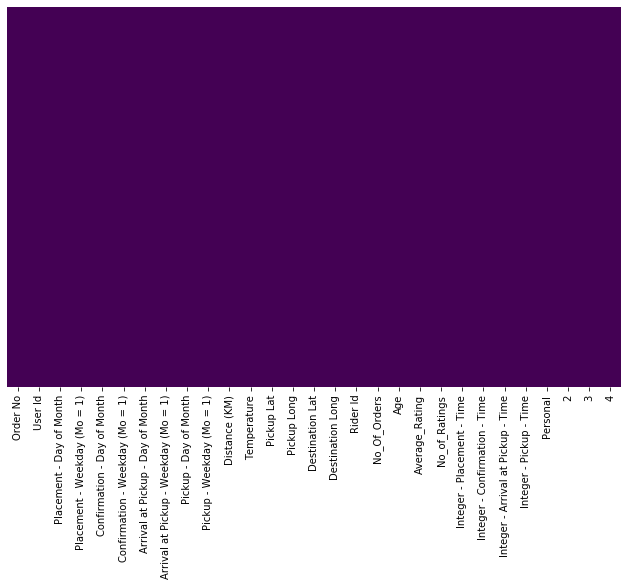

In [26]:
# Visualise Missing
plt.figure(figsize=(11,7))
sns.heatmap(test_3.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Visualise correlation after data preprocessing

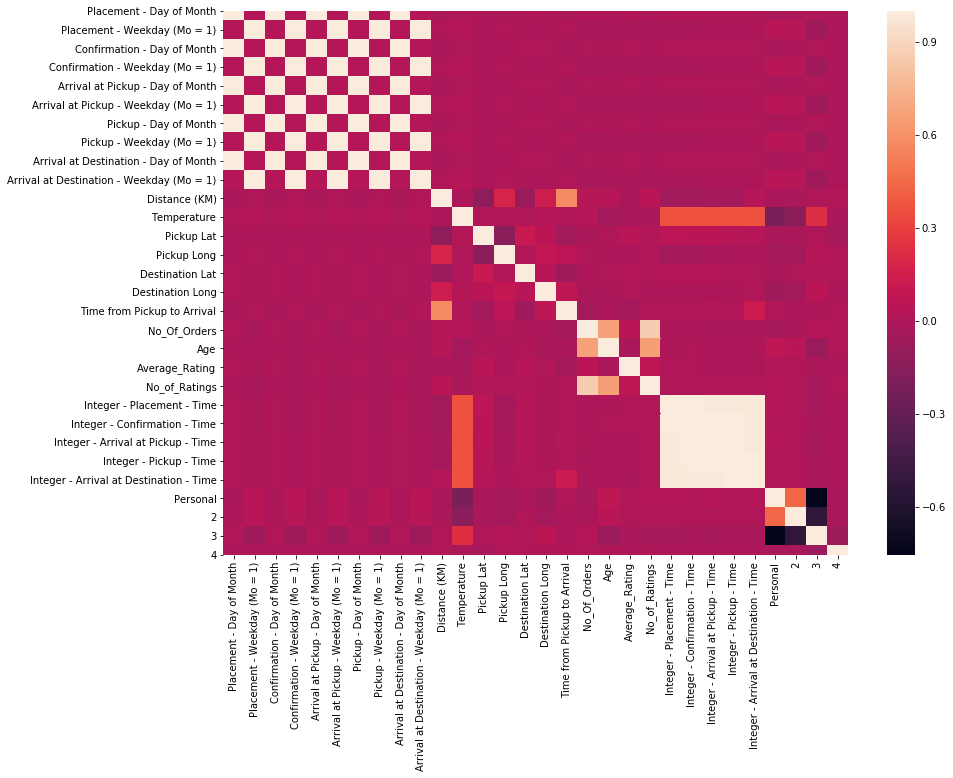

In [27]:
correlation = train_3.corr()
_ = plt.figure(figsize=(14,10))
_ = sns.heatmap(correlation)

### Geographical Plot
Visualise the pickup locations and destinations on a map

In [ ]:
# coodinates = train_3[['Pickup Long','Pickup Lat','Destination Long','Destination Lat']]

In [ ]:
# !pip install folium

***
# Section 3: Machine Learning
***

###  Feature Engineering
- Create a new feature for speed (abandon this becuase it assumes knowledge ofthe future: Leakage)
- Create a new column for time taken from order placement to pickup

In [ ]:
# def speed(df):
#     """
#     Creates a new column Speed (KM/H) 
#     """ 
#     df['Time'] = [(time/60)/60 for time in df['Time from Pickup to Arrival']]
#     df['Speed (KM/H)'] = df['Distance (KM)']/df['Time']
#     df.drop('Time',1,inplace=True)

#     return df   

In [28]:
def time_taken(df):
    """
    Calculates the time taken from Order placement to delivery
    """
    df['Time Taken'] = df['Integer - Pickup - Time'] - df['Integer - Placement - Time']
    
    return df
    

In [ ]:
# Add Speed column to training

# train_final = speed(train_2)

# train_final.head(10)

In [29]:
# Add Time Taken to Training
train_final = time_taken(train_3)
test_final = time_taken(test_3)

In [30]:
train_final.head(3)

,Order No,User Id,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),...,Integer - Placement - Time,Integer - Confirmation - Time,Integer - Arrival at Pickup - Time,Integer - Pickup - Time,Integer - Arrival at Destination - Time,Personal,2,3,4,Time Taken
0,Order_No_4211,User_Id_633,9,5,9,5,9,5,9,5,...,34546,34810,36287,37650,38395,0,0,1,0,3104
1,Order_No_27440,User_Id_2642,18,5,18,5,18,5,18,5,...,56477,56490,58036,58417,61303,1,0,1,0,1940
2,Order_No_14170,User_Id_3339,31,5,31,5,31,5,31,5,...,46301,47569,48002,48788,51403,0,0,1,0,2487


In [31]:
test_final.columns

Index([                            'Order No',
                                    'User Id',
                   'Placement - Day of Month',
               'Placement - Weekday (Mo = 1)',
                'Confirmation - Day of Month',
            'Confirmation - Weekday (Mo = 1)',
           'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)',
                      'Pickup - Day of Month',
                  'Pickup - Weekday (Mo = 1)',
                              'Distance (KM)',
                                'Temperature',
                                 'Pickup Lat',
                                'Pickup Long',
                            'Destination Lat',
                           'Destination Long',
                                   'Rider Id',
                               'No_Of_Orders',
                                        'Age',
                             'Average_Rating',
                              'No_of_Ratings',
             

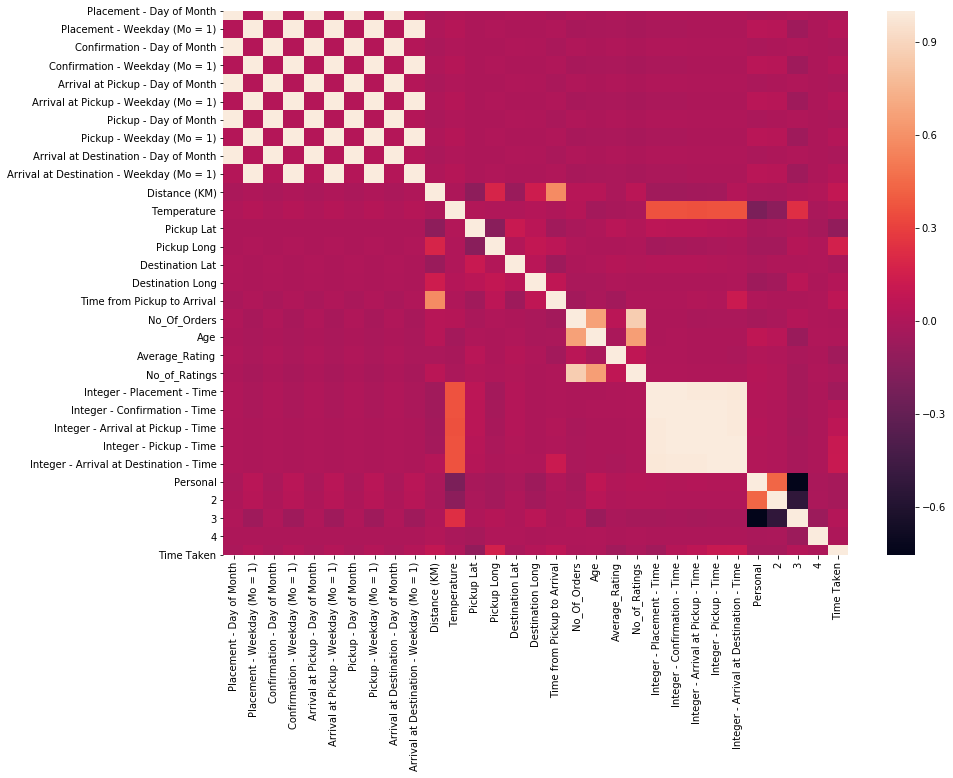

In [32]:
# Visualise correlation after the additional features have been created
correlation = train_final.corr()
_ = plt.figure(figsize=(14,10))
_ = sns.heatmap(correlation)

### Train a model and make prediction

- Create a function to generate a X_train, y_train, X_test, y_test data
- Create a function to train the model
- Create a function to make Predictions
- Create function to test the model

In [144]:
# # Create a function to generate a X_train, y_train, X_test, y_test data
# def train_test_data(train_data):
    
#     """
#     Creates the X_train, y_train, X_test, y_test
#     """
    
#     X = train_data[['Placement - Day of Month',
#                 'Placement - Weekday (Mo = 1)',
#                      'Confirmation - Day of Month',
#                  'Confirmation - Weekday (Mo = 1)',
#                 'Arrival at Pickup - Day of Month',
#             'Arrival at Pickup - Weekday (Mo = 1)',
#                            'Pickup - Day of Month',
#                        'Pickup - Weekday (Mo = 1)',
#            'Arrival at Destination - Day of Month',
#        'Arrival at Destination - Weekday (Mo = 1)',
#                                    'Distance (KM)',
#                                      'Temperature',
#                                       'Pickup Lat',
#                                      'Pickup Long',
#                                  'Destination Lat',
#                                 'Destination Long',
#                                     'No_Of_Orders',
#                                              'Age',
#                                   'Average_Rating',
#                                    'No_of_Ratings',
#                       'Integer - Placement - Time',
#                    'Integer - Confirmation - Time',
#               'Integer - Arrival at Pickup - Time',
#                          'Integer - Pickup - Time',
#          'Integer - Arrival at Destination - Time',
#                                         'Personal',
#                                                  2,
#                                                  3,
#                                                  4,
#                                       'Time Taken']]
#     y = train_data['Time from Pickup to Arrival']

#     X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

    
    
#     return X_train, X_test, y_test, y_test


    

In [33]:
# Create a function to train the model

def train_model(X, y):
    """
    Train Ridge and evaluate
    """
    
    from sklearn.linear_model import Ridge, LinearRegression
    
    Rd = Ridge(alpha=1.0) 
    lm = LinearRegression()
    model_fit = Rd.fit(X, y)
    
    return model_fit     

In [38]:
# Create a function to make predictions

def make_predictions(model,X_test):
    """
    Be in the habit of writing doc strings
    """
    
    predictions = model.predict(X_test)
    
    return predictions

In [39]:
# Make a function to test the model

def model_evaluation(y_test,pred):
    """
    Be in the habit of making doc strings
    """
    from sklearn.metrics import mean_squared_error as mse

    model_test = round(np.sqrt(mse(y_test,pred)),2)
    
    return model_test

### Bring it all together

In [41]:
# Get the data
from sklearn.model_selection import train_test_split
X = train_final[['Placement - Day of Month',
                'Placement - Weekday (Mo = 1)',
                     'Confirmation - Day of Month',
                 'Confirmation - Weekday (Mo = 1)',
                'Arrival at Pickup - Day of Month',
            'Arrival at Pickup - Weekday (Mo = 1)',
                           'Pickup - Day of Month',
                       'Pickup - Weekday (Mo = 1)',
                                   'Distance (KM)',
                                     'Temperature',
                                    'No_Of_Orders',
                                             'Age',
                                  'Average_Rating',
                                   'No_of_Ratings',
                      'Integer - Placement - Time',
                   'Integer - Confirmation - Time',
              'Integer - Arrival at Pickup - Time',
                         'Integer - Pickup - Time',
                                        'Personal',
                                                 2,
                                                 3,
                                                 4,
                                      'Time Taken']]

y = train_final['Time from Pickup to Arrival']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


In [42]:
X_train.shape

(14840, 23)

In [43]:
# Train the model
model = train_model(X_train,y_train)
model

Ridge()

In [44]:
# Make predictions
predictions = make_predictions(model,X_test)

In [45]:
# Evaluate the model
score = model_evaluation(y_test,predictions)
score

796.66

In [46]:
print(model.intercept_)

1094.397715780703


In [47]:
coeffs = pd.DataFrame(model.coef_,X.columns,columns=['Coeffs'])
coeffs

,Coeffs
Placement - Day of Month,-166.316212
Placement - Weekday (Mo = 1),-165.499219
Confirmation - Day of Month,55.148013
Confirmation - Weekday (Mo = 1),55.965006
Arrival at Pickup - Day of Month,55.148013
Arrival at Pickup - Weekday (Mo = 1),55.965006
Pickup - Day of Month,55.148013
Pickup - Weekday (Mo = 1),55.965006
Distance (KM),101.445505
Temperature,2.112888


In [48]:
test_data = test_final.drop(['Order No','Rider Id', 'User Id','Pickup Lat','Pickup Long','Destination Lat','Destination Long'],1)

sample['Time from Pickup to Arrival'] = model.predict(test_data)

In [49]:
sample.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1453.255166
1,Order_No_12736,2685.307146
2,Order_No_768,1789.302738
3,Order_No_15332,2151.643671
4,Order_No_21373,2480.168985


In [50]:
sample.to_csv('Team_eleven_submission.csv')

In [51]:
X_train.columns

Index([            'Placement - Day of Month',
               'Placement - Weekday (Mo = 1)',
                'Confirmation - Day of Month',
            'Confirmation - Weekday (Mo = 1)',
           'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)',
                      'Pickup - Day of Month',
                  'Pickup - Weekday (Mo = 1)',
                              'Distance (KM)',
                                'Temperature',
                               'No_Of_Orders',
                                        'Age',
                             'Average_Rating',
                              'No_of_Ratings',
                 'Integer - Placement - Time',
              'Integer - Confirmation - Time',
         'Integer - Arrival at Pickup - Time',
                    'Integer - Pickup - Time',
                                   'Personal',
                                            2,
                                            3,
             

In [52]:
import pickle
model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

In [53]:
y_pred = unpickled_model.predict(X_test)


NameError: name 'unpickled_model' is not defined

In [ ]:
y_train = train_riders[['Time from Pickup to Arrival']]
X_train = train[['Pickup Lat','Pickup Long',
                 'Destination Lat','Destination Long']]

# Fit model
lm_regression = LinearRegression(normalize=True)
print ("Training Model...")
lm_regression.fit(X_train, y_train)

# Pickle model for use within our API
save_path = '../trained-models/sendy_simple_lm_regression.pkl'
print (f"Training completed. Saving model to: {save_path}")
pickle.dump(lm_regression, open(save_path,'wb'))